<a href="https://colab.research.google.com/github/Bhavnicksm/dsp_lab_notebooks/blob/main/EE333_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.io import wavfile

import librosa as lb

# Question 1
Take a 5 second sample of your speech, sampled at 8 kHz, and perform linear predictive coding
with predictor lengths 4,8,16 on it. Calculate the processing gain in each case.

In [36]:
# importing the file
rate, signal = wavfile.read("sound_file_lab_2.wav")
signal = signal[:,0]
print(rate)

48000


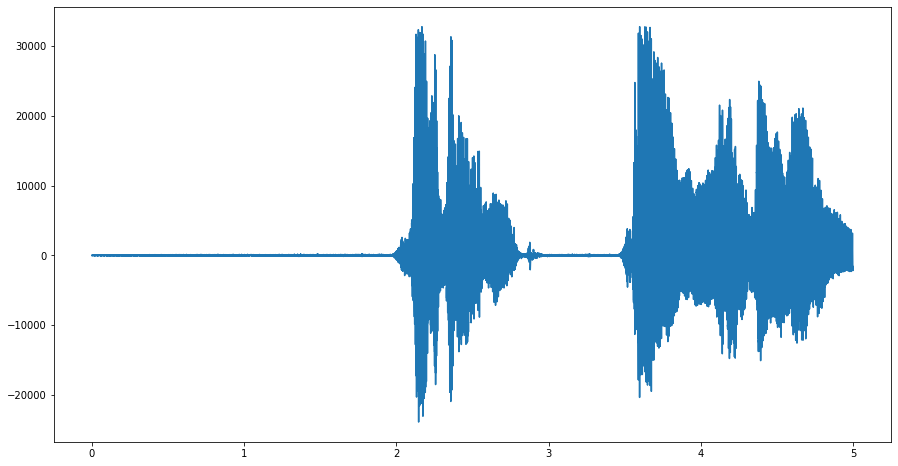

In [37]:
signal = signal[1*rate:6*rate]
time_axis = np.arange(0,len(signal)/rate, 1/rate)
# time_axis = time_axis[:-1]

plt.figure(figsize=(15,8))
plt.plot(time_axis,signal)
plt.show()

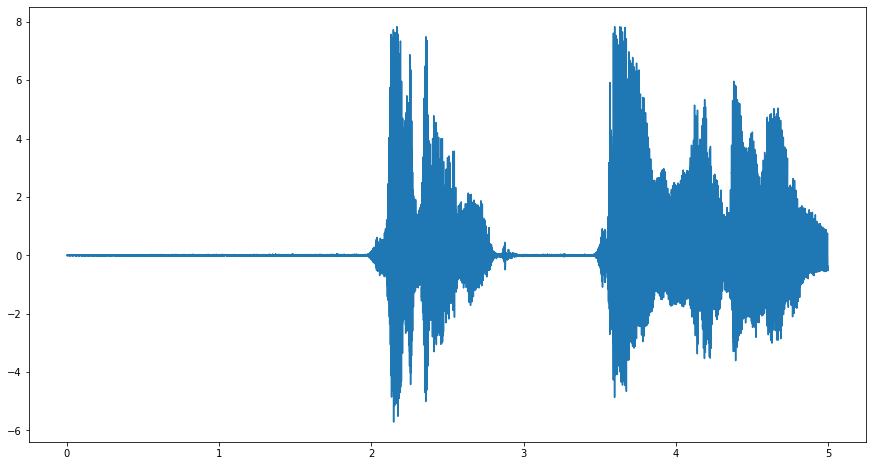

In [38]:
# Normalizing the signal
signal = (signal - np.mean(signal))/ np.std(signal)

plt.figure(figsize=(15,8))
plt.plot(time_axis,signal)
plt.show()

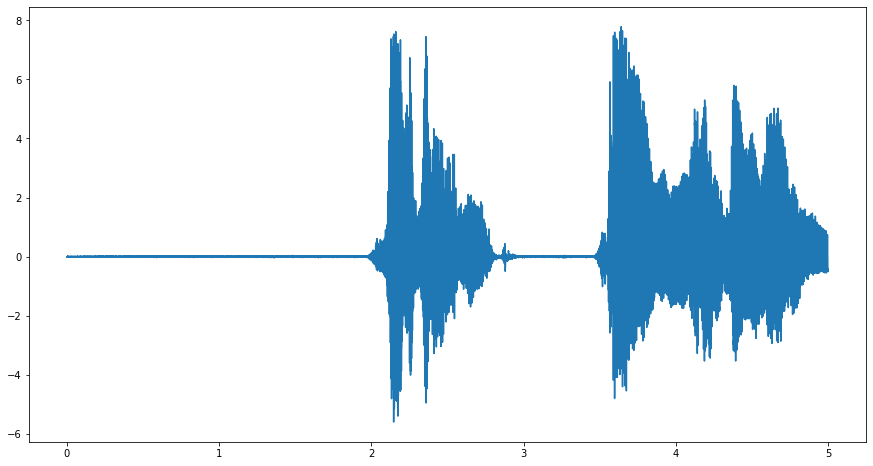

In [39]:
# resampling at 8KHz
sample_rate = rate//8000
signal = signal[::sample_rate]
time_axis = time_axis[::sample_rate]

plt.figure(figsize=(15,8))
plt.plot(time_axis,signal)
plt.show()

In [122]:
# doing the LPC
def lpc(pred_len):
  window_size = int((40/1000)*8000)  
  num_windows = int(len(signal)/window_size)
  # pred_len = int(4.0)


  # print(window_size)
  # print(num_windows)
  # print(pred_len)

  proc_gain = 0
  signal_predicted= np.zeros((len(signal)))

  for window in range(int(num_windows)):
    signal_window = signal[window*window_size: (window + 1)*window_size]

    # Calculating R value by taking mean of all x*x.T matrices
    R = np.zeros((pred_len, pred_len))
    for i in range(len(signal_window)-(pred_len)):
      x = np.reshape(signal_window[i:i+pred_len], (pred_len,1))
      R_p = np.matmul(x,x.T)
      R = R + R_p
    R = R/(len(signal_window) - (pred_len))


    # Calculating Q value by taking the mean of x*signal[i]
    q = np.zeros((pred_len,1))

    for i in range(len(signal_window) - (pred_len)):
      q_p = signal_window[i:i+pred_len]* signal_window[i+pred_len]
      q = q + np.reshape(q_p, (pred_len,1))

    q = q/(len(signal_window) - (pred_len))
    # print(q.shape)
    # print(q)


    # print(R) 
    R_inv = np.linalg.inv(R)
    # print(R_inv.shape) 

    w_o = np.dot(R_inv, q)

    # print(w_o)
    
    # w_lb = librosa.lpc(signal_window, 4) 

    # print(w_lb)

    sig_pred = np.zeros((len(signal_window)))

    for i in range(pred_len):
      sig_pred[i] = signal_window[i]

    for i in range(len(signal_window)-pred_len):
      x = signal_window[i:i+pred_len]
      sig_pred[i+pred_len]= np.matmul(x,w_o)

    
    signal_predicted[window*window_size: (window+1)*window_size] = sig_pred

    err = signal_window - sig_pred

    proc_gain += np.var(signal_window)/np.var(err)
    
  print(f"Processing gain: {proc_gain:.3f}")
  
  # Plotting the signals
  plt.figure(figsize=(15,8))
  plt.subplot(311)
  plt.plot(signal)
  plt.subplot(312)
  plt.plot(signal_predicted)
  plt.subplot(313)
  plt.plot(signal_predicted)
  plt.plot(signal)
  plt.show()

Processing gain: 2977.320


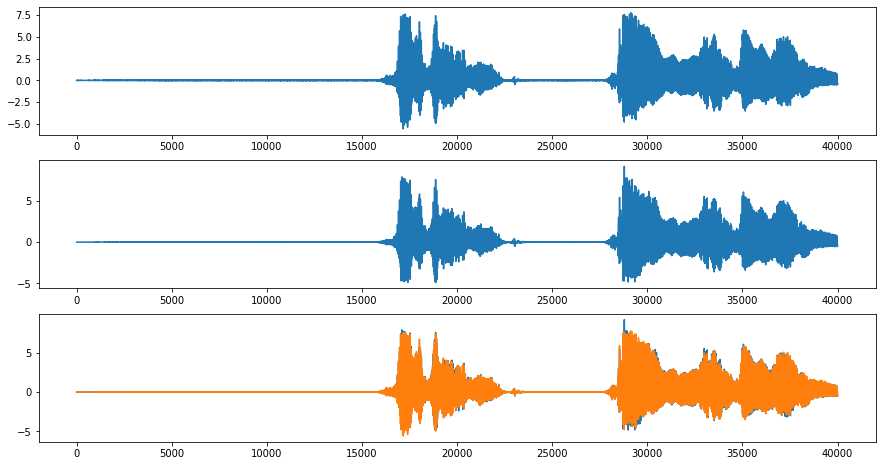

In [123]:
lpc(4)

Processing gain: 3816.490


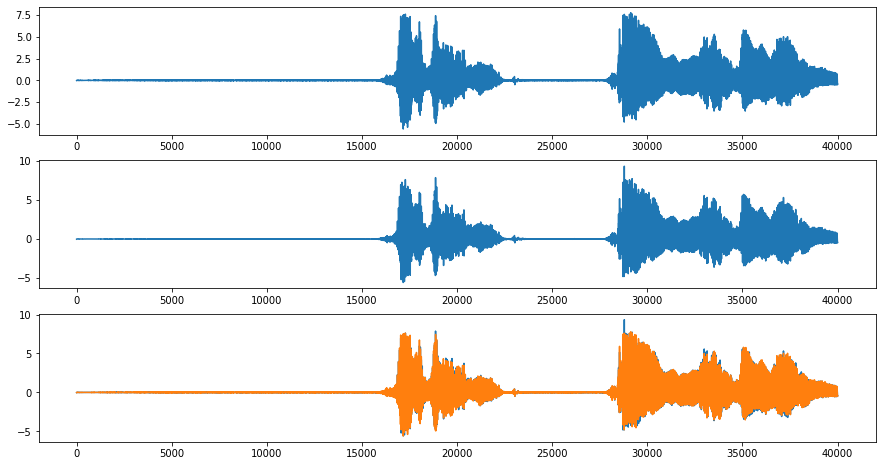

In [124]:
lpc(8)

Processing gain: 5619.476


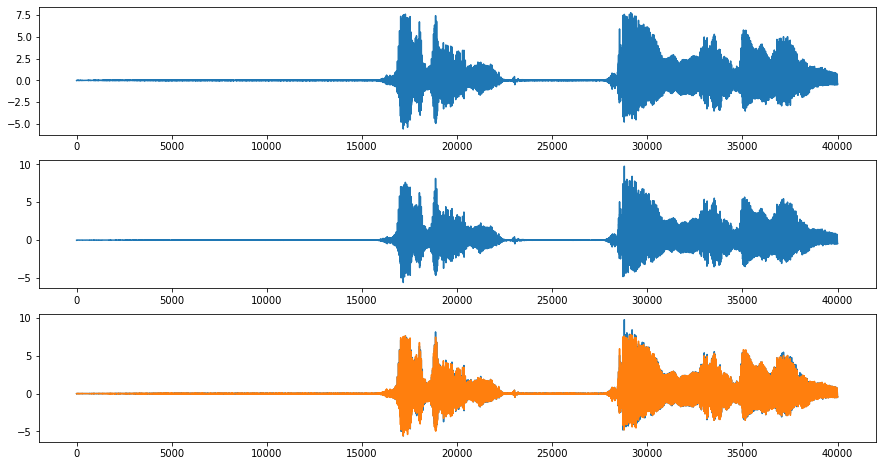

In [125]:
lpc(16)